In [1]:
%pip install numpy
%pip install matplotlib
%pip install noise

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import noise

fig_size = 10
map_size = 1024
ref_size = 1024
shape = (map_size, map_size)

def generate_noise_layer(scale=1.0, z_layer=0.0):
    """
    Generate Perlin noise using the noise library.
    """
    noise_array = np.zeros(shape)
    for x in range(shape[0]):
        for y in range(shape[1]):
            noise_array[x][y] = noise.snoise3(scale * (x / ref_size), scale * (y / ref_size), z_layer)
    return (noise_array / 2.0) + 0.5

class NoiseLayer:
    def __init__(self, value, title, cmap="magma"):
        self.value = value
        self.title = title
        self.cmap = cmap

def display_multiple_noise_layers(noise_layers):
    """
    Display multiple noise layers as subplots.

    Parameters:
    noise_layers (list): List of 2D numpy arrays, each representing a noise layer
    titles (list): Optional list of titles for each subplot
    """
    num_layers = len(noise_layers)
    rows = int(np.ceil(np.sqrt(num_layers)))
    cols = int(np.ceil(num_layers / rows))

    fig, axes = plt.subplots(rows, cols, figsize=(fig_size*cols, fig_size*rows))
    fig.suptitle("Noise Layers", fontsize=16)

    if num_layers == 1:
        axes = np.array([axes])

    for i, noise_layer in enumerate(noise_layers):
        ax = axes.flat[i]
        ax.set_xticks(np.arange(0, noise_layer.value.shape[1], 8))
        ax.set_yticks(np.arange(0, noise_layer.value.shape[0], 8))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # ax.grid(True)
        im = ax.imshow(noise_layer.value, cmap=noise_layer.cmap)
        ax.set_title(noise_layer.title)
        fig.colorbar(im, ax=ax)

    # Hide any unused subplots
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()

high_freq = generate_noise_layer(2000.0, 0)
mh_freq = generate_noise_layer(250.0, 0)
mid_freq = generate_noise_layer(50.0, 0)
low_freq = generate_noise_layer(1.0, 0)

biome = generate_noise_layer(1.0, 123.923)
richness = generate_noise_layer(2.0, 1.5)
resources = generate_noise_layer(1.6, 3.472)

def posterize(arr, num_layers=5):
    # Create evenly spaced thresholds between 0 and 1
    thresholds = np.linspace(0, 1, num_layers + 1)

    # Digitize the array
    posterized = np.digitize(arr, thresholds[1:-1])

    # Scale the result to be between 0 and 1
    scaled = (posterized - 1) / (num_layers - 1)

    return scaled

biome = posterize(biome, 5)

diamond_presence = np.where(richness > 0.5, 1.0, 0.0)
diamond_presence = diamond_presence * high_freq * mid_freq * mh_freq
diamond_presence = np.where(diamond_presence > 0.5, 1, 0)

carbon_distribution = high_freq * mid_freq * mh_freq * (richness * 0.7 + 0.3)
carbon_distribution = np.where(carbon_distribution > 0.3, 1, 0)

# carbon_distribution = high_freq * mid_freq * mh_freq

diamon_inverse = 1.0 - diamond_presence
total_resources = (carbon_distribution * diamon_inverse * 0.6) + diamond_presence

noise_layers = [
    NoiseLayer(high_freq, "High"),
    NoiseLayer(mh_freq, "MH"),
    NoiseLayer(mid_freq, "Mid"),
    NoiseLayer(low_freq, "Low"),
    NoiseLayer(biome, "Biome"),
    NoiseLayer(richness, "Richness"),
    NoiseLayer(resources, "Resources"),
    NoiseLayer(carbon_distribution, "Carbon Distribution"),
    NoiseLayer(diamond_presence, "Diamond Presence"),
    NoiseLayer(total_resources, "Total Resources", cmap="bwr"),
]

# display_multiple_noise_layers(noise_layers)

# display_multiple_noise_layers([NoiseLayer(total_resources, "Total Resources", cmap="bwr"),])


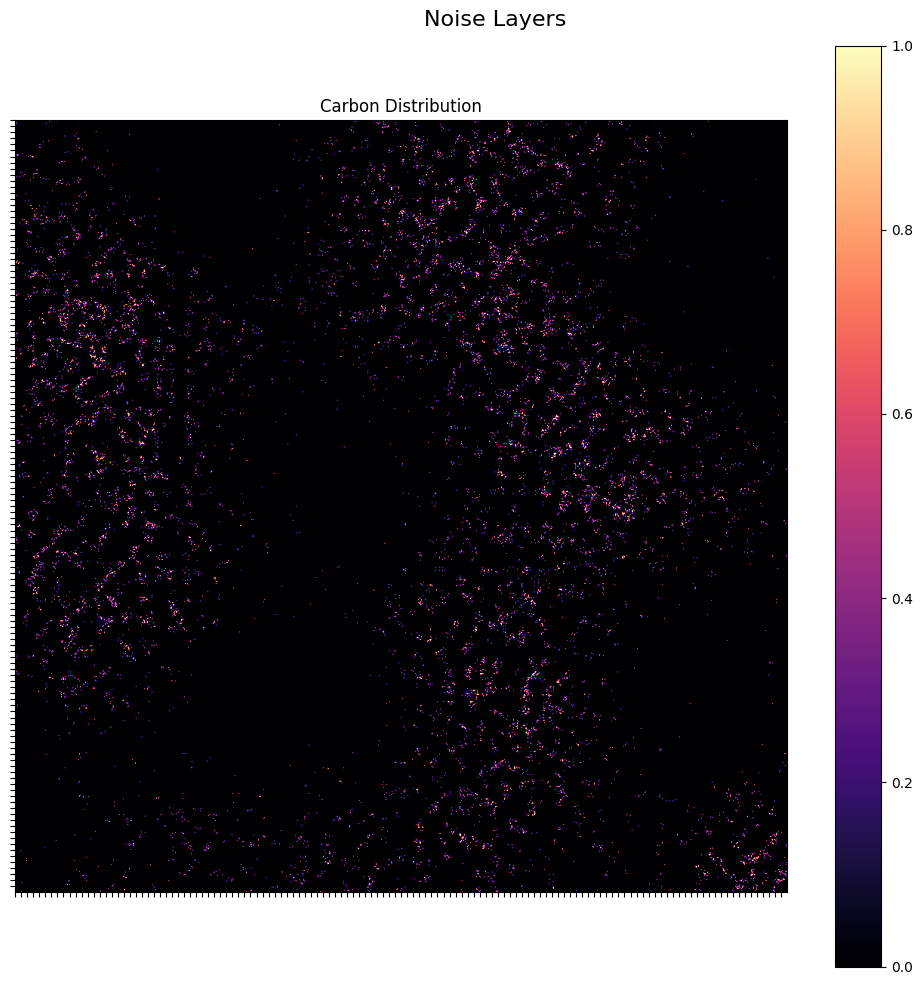

In [3]:
display_multiple_noise_layers([NoiseLayer(carbon_distribution, "Carbon Distribution"),])